In [1]:
#diabetes.csv

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#train_test_split
X=df.drop("Outcome",axis=1)
Y=df["Outcome"]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [8]:
def create_model(model):
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    print(classification_report(Y_test,y_pred))
    print("Confusion matrix: ")
    print(confusion_matrix(Y_test,y_pred))
    return model

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [10]:
lr=LogisticRegression()

In [11]:
create_model(lr)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231

Confusion matrix: 
[[132  14]
 [ 36  49]]


LogisticRegression()

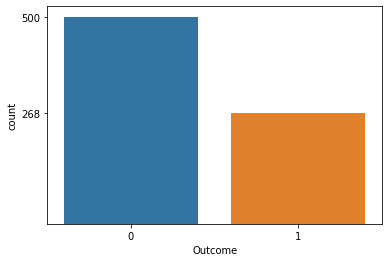

In [12]:
sns.countplot(data=df,x="Outcome")
c=df["Outcome"].value_counts()
plt.yticks(c)
plt.show()

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt=DecisionTreeClassifier()

In [15]:
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       146
           1       0.59      0.52      0.55        85

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.66       231
weighted avg       0.68      0.69      0.68       231

Confusion matrix: 
[[115  31]
 [ 41  44]]


In [16]:
#Ada Boost apply:- This is Ensembling technique
from sklearn.ensemble import AdaBoostClassifier

In [17]:
#create the object of AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=60) #n_estimators=100 this ia a parameter (it is used for iteration)
#the value of n_estimater can be <=100

In [18]:
#call function
create_model(ada)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
           1       0.75      0.62      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231

Confusion matrix: 
[[128  18]
 [ 32  53]]


AdaBoostClassifier(n_estimators=60)

In [19]:
#2. Gradient Boosting:
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
#create object
gbc=GradientBoostingClassifier()

In [21]:
create_model(gbc)

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       146
           1       0.76      0.65      0.70        85

    accuracy                           0.80       231
   macro avg       0.79      0.77      0.77       231
weighted avg       0.79      0.80      0.79       231

Confusion matrix: 
[[129  17]
 [ 30  55]]


GradientBoostingClassifier()

In [22]:
#3.XG- boosting
from xgboost import XGBClassifier 

In [23]:
#create object
xgb=XGBClassifier(n_estimators=100,reg_alpha=1) #reg_alpha= 1 means automatic handle over fitting situation and outlier

In [24]:
#call function
create_model(xgb)

[13:11:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       146
           1       0.75      0.64      0.69        85

    accuracy                           0.79       231
   macro avg       0.78      0.76      0.76       231
weighted avg       0.78      0.79      0.78       231

Confusion matrix: 
[[128  18]
 [ 31  54]]


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)